                                        Chilled Water Anomaly Detection Project

The chilled water anomaly detection explains about the anomalies detected in the chilled Water dataset. It consist of the timestaamp column dataset. 

Basically, here we will be performing the time series dataset anomaly detection on the dataset. 

Basically, we can say that a chilled water Anomaly detection project deals with the monitoring of the performance of a chilled water system and detecting unsual behavior in the whole system. 

Here, we wil be using the ML Anomaly Detection Algorithms like the: 

1. Isolation Forest : It represents the detection of the global anomalies. 

2. Local Outlier Factor : it represents the detection of the local anomalies.  

3. Robust Covariance : it helps in detecting the statistical anomalies. 

In [1]:
# Importing the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Impoorting the data 
data = pd.read_csv("chilledwater.csv") 
data 

,timestamp,Panther_office_Clementine,Panther_lodging_Cora,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Kristina,Panther_education_Neal,Panther_lodging_Kara,Panther_office_Garth,Panther_office_Lavinia,...,Cockatoo_religion_Diedre,Cockatoo_office_Nola,Cockatoo_assembly_Doyle,Cockatoo_lodging_Kerri,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_health_Ashlie
0,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.1681,41.0381,1.5330,0.0,93.3358,3.1845,12.9448,0.0000,18.3769,206.2924
1,2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.8779,39.6620,1.8534,0.0,89.4310,3.0027,15.3159,0.0000,21.7901,199.1167
2,2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.5326,39.4253,1.7707,0.0,85.8087,3.1388,13.8525,0.0000,17.6219,208.9164
3,2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.5913,40.4044,1.7458,0.0,90.8272,3.2031,12.4275,0.0000,20.6640,202.9993
4,2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0904,41.0916,1.7507,0.0,90.6999,2.9331,12.6853,0.0000,16.2412,204.9040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,NaN,173.1888,37.1119,779.3498,0.0,222.6714,173.1888,0.0,37.1119,...,7.7466,31.4002,0.0000,0.0,114.3637,9.8862,50.5916,3.2847,0.0000,56.2066
17540,2017-12-31 20:00:00,NaN,173.1888,12.3706,680.3848,0.0,222.6714,160.8182,0.0,24.7413,...,7.5486,32.4391,0.0000,0.0,105.5076,9.5482,43.5446,1.0086,0.0000,56.5411
17541,2017-12-31 21:00:00,NaN,148.4476,98.9651,680.3848,0.0,210.3007,173.1888,0.0,37.1119,...,8.0592,28.1257,0.0000,0.0,61.6187,8.9880,31.3541,2.0739,0.0000,55.1653
17542,2017-12-31 22:00:00,NaN,160.8182,123.7063,643.2729,0.0,222.6714,185.5595,0.0,24.7413,...,7.9003,29.2215,0.0000,0.0,95.2212,8.9722,53.0577,2.1600,0.0000,43.0888


Now, we will be carrying ut the analysis on the whole datato perform the whole analysis further 

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 556 entries, timestamp to Cockatoo_health_Ashlie
dtypes: float64(555), object(1)
memory usage: 74.4+ MB


In [4]:
data.describe() 

,Panther_office_Clementine,Panther_lodging_Cora,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Kristina,Panther_education_Neal,Panther_lodging_Kara,Panther_office_Garth,Panther_office_Lavinia,Panther_education_Enriqueta,...,Cockatoo_religion_Diedre,Cockatoo_office_Nola,Cockatoo_assembly_Doyle,Cockatoo_lodging_Kerri,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_health_Ashlie
count,5798.000000,13995.000000,15473.000000,16023.000000,15945.000000,16020.000000,15999.000000,14963.000000,16015.000000,16023.000000,...,15862.000000,15866.000000,15814.000000,14726.000000,15849.000000,15867.000000,15851.000000,15845.000000,15825.000000,15866.000000
mean,283.323307,771.365372,741.079689,2443.132831,84.474784,638.494717,1011.430130,341.410582,44.688706,421.231921,...,27.673887,82.961382,41.481253,85.649456,911.820305,9.298258,247.098791,144.411114,99.117633,220.952900
std,127.168084,506.397842,579.507974,1055.406466,181.189337,641.360549,508.348792,232.145566,19.014140,314.005432,...,17.419326,58.579076,38.874024,113.882886,1020.680708,8.512647,326.945310,187.326116,116.262441,131.427824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,31.283100,1.522100,0.000000,0.000000,0.000000,0.000000
25%,197.930100,408.230800,123.706300,1657.664600,0.000000,210.300700,643.272900,123.706300,24.741300,111.335700,...,12.275775,39.913100,11.165750,0.000000,116.874400,3.481300,32.759800,1.721500,12.176000,94.315925
50%,272.153900,668.014100,804.091000,2535.979500,0.000000,494.825300,952.538600,358.748300,37.111900,445.342700,...,18.329300,53.535400,29.987650,6.184900,330.072600,4.735800,56.004400,24.837400,29.085800,221.577200
75%,358.748300,1014.391800,1224.692500,3389.553100,111.335700,1100.986200,1422.622600,531.937200,61.853200,655.643500,...,44.478725,114.239725,58.529575,164.089725,1586.921600,13.353300,379.288400,286.475900,177.597100,327.613300
max,1014.391800,2399.902600,2288.566900,4453.427400,1434.993300,50587.327500,2771.021500,1187.580600,123.706300,1274.175100,...,75.061200,297.535400,178.979900,504.273000,4593.103200,55.617200,1593.176300,771.822700,466.089900,566.801200


In [5]:
data.shape

(17544, 556)

In [6]:
for col in data.columns: 
    print(col) 

timestamp
Panther_office_Clementine
Panther_lodging_Cora
Panther_education_Teofila
Panther_education_Jerome
Panther_retail_Kristina
Panther_education_Neal
Panther_lodging_Kara
Panther_office_Garth
Panther_office_Lavinia
Panther_education_Enriqueta
Panther_lodging_Marisol
Panther_education_Aurora
Panther_lodging_Kirk
Panther_education_Vincent
Panther_office_Brent
Panther_office_Karla
Panther_education_Quintin
Panther_other_Bettie
Panther_education_Annetta
Panther_education_Ivan
Panther_office_Graham
Panther_education_Emily
Panther_education_Cleopatra
Panther_office_Christian
Panther_education_Zelda
Fox_lodging_Stephen
Fox_lodging_Stephan
Fox_office_Israel
Fox_education_Lilly
Fox_education_Gayla
Fox_lodging_Warren
Fox_education_Andre
Fox_retail_Manie
Fox_assembly_Emma
Fox_office_Margarita
Fox_lodging_Frances
Fox_office_Demetrius
Fox_office_Berniece
Fox_office_Alice
Fox_education_Leota
Fox_assembly_Adrianne
Fox_lodging_Morris
Fox_education_Theodore
Fox_education_Dewayne
Fox_assembly_Johnn

In [7]:
data.isnull().sum()  

# Here, as we can see that there are a lot of empty values in the whole dataset 

timestamp                        0
Panther_office_Clementine    11746
Panther_lodging_Cora          3549
Panther_education_Teofila     2071
Panther_education_Jerome      1521
                             ...  
Cockatoo_education_Minh       1677
Cockatoo_education_June       1693
Cockatoo_education_Lionel     1699
Cockatoo_public_Leah          1719
Cockatoo_health_Ashlie        1678
Length: 556, dtype: int64

Now, comes the conversion of the timestamp to the datetime column 

In [8]:
data['timestamp'] = pd.to_datetime(data['timestamp'])  

data['timestamp'] 

0       2016-01-01 00:00:00
1       2016-01-01 01:00:00
2       2016-01-01 02:00:00
3       2016-01-01 03:00:00
4       2016-01-01 04:00:00
                ...        
17539   2017-12-31 19:00:00
17540   2017-12-31 20:00:00
17541   2017-12-31 21:00:00
17542   2017-12-31 22:00:00
17543   2017-12-31 23:00:00
Name: timestamp, Length: 17544, dtype: datetime64[ns]

Now, we will be dropping the timestamp column to go for the further pre processing as: 

In [9]:
x = data.drop(['timestamp'], axis = 1)  
x 

,Panther_office_Clementine,Panther_lodging_Cora,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Kristina,Panther_education_Neal,Panther_lodging_Kara,Panther_office_Garth,Panther_office_Lavinia,Panther_education_Enriqueta,...,Cockatoo_religion_Diedre,Cockatoo_office_Nola,Cockatoo_assembly_Doyle,Cockatoo_lodging_Kerri,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_health_Ashlie
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.1681,41.0381,1.5330,0.0,93.3358,3.1845,12.9448,0.0000,18.3769,206.2924
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.8779,39.6620,1.8534,0.0,89.4310,3.0027,15.3159,0.0000,21.7901,199.1167
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.5326,39.4253,1.7707,0.0,85.8087,3.1388,13.8525,0.0000,17.6219,208.9164
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.5913,40.4044,1.7458,0.0,90.8272,3.2031,12.4275,0.0000,20.6640,202.9993
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0904,41.0916,1.7507,0.0,90.6999,2.9331,12.6853,0.0000,16.2412,204.9040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,NaN,173.1888,37.1119,779.3498,0.0,222.6714,173.1888,0.0,37.1119,0.0,...,7.7466,31.4002,0.0000,0.0,114.3637,9.8862,50.5916,3.2847,0.0000,56.2066
17540,NaN,173.1888,12.3706,680.3848,0.0,222.6714,160.8182,0.0,24.7413,0.0,...,7.5486,32.4391,0.0000,0.0,105.5076,9.5482,43.5446,1.0086,0.0000,56.5411
17541,NaN,148.4476,98.9651,680.3848,0.0,210.3007,173.1888,0.0,37.1119,0.0,...,8.0592,28.1257,0.0000,0.0,61.6187,8.9880,31.3541,2.0739,0.0000,55.1653
17542,NaN,160.8182,123.7063,643.2729,0.0,222.6714,185.5595,0.0,24.7413,0.0,...,7.9003,29.2215,0.0000,0.0,95.2212,8.9722,53.0577,2.1600,0.0000,43.0888


In [10]:
# Like, we saw above, that there are a lot of empty values in the whole dataset and hence, now they can be treated.  

x = x.apply(pd.to_numeric, errors = 'coerce') 
x = x.fillna(x.mean()) 

x 

,Panther_office_Clementine,Panther_lodging_Cora,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Kristina,Panther_education_Neal,Panther_lodging_Kara,Panther_office_Garth,Panther_office_Lavinia,Panther_education_Enriqueta,...,Cockatoo_religion_Diedre,Cockatoo_office_Nola,Cockatoo_assembly_Doyle,Cockatoo_lodging_Kerri,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_health_Ashlie
0,283.323307,771.365372,741.079689,2443.132831,84.474784,638.494717,1011.43013,341.410582,44.688706,421.231921,...,9.1681,41.0381,1.5330,0.0,93.3358,3.1845,12.9448,0.0000,18.3769,206.2924
1,283.323307,771.365372,741.079689,2443.132831,84.474784,638.494717,1011.43013,341.410582,44.688706,421.231921,...,8.8779,39.6620,1.8534,0.0,89.4310,3.0027,15.3159,0.0000,21.7901,199.1167
2,283.323307,771.365372,741.079689,2443.132831,84.474784,638.494717,1011.43013,341.410582,44.688706,421.231921,...,8.5326,39.4253,1.7707,0.0,85.8087,3.1388,13.8525,0.0000,17.6219,208.9164
3,283.323307,771.365372,741.079689,2443.132831,84.474784,638.494717,1011.43013,341.410582,44.688706,421.231921,...,8.5913,40.4044,1.7458,0.0,90.8272,3.2031,12.4275,0.0000,20.6640,202.9993
4,283.323307,771.365372,741.079689,2443.132831,84.474784,638.494717,1011.43013,341.410582,44.688706,421.231921,...,9.0904,41.0916,1.7507,0.0,90.6999,2.9331,12.6853,0.0000,16.2412,204.9040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,283.323307,173.188800,37.111900,779.349800,0.000000,222.671400,173.18880,0.000000,37.111900,0.000000,...,7.7466,31.4002,0.0000,0.0,114.3637,9.8862,50.5916,3.2847,0.0000,56.2066
17540,283.323307,173.188800,12.370600,680.384800,0.000000,222.671400,160.81820,0.000000,24.741300,0.000000,...,7.5486,32.4391,0.0000,0.0,105.5076,9.5482,43.5446,1.0086,0.0000,56.5411
17541,283.323307,148.447600,98.965100,680.384800,0.000000,210.300700,173.18880,0.000000,37.111900,0.000000,...,8.0592,28.1257,0.0000,0.0,61.6187,8.9880,31.3541,2.0739,0.0000,55.1653
17542,283.323307,160.818200,123.706300,643.272900,0.000000,222.671400,185.55950,0.000000,24.741300,0.000000,...,7.9003,29.2215,0.0000,0.0,95.2212,8.9722,53.0577,2.1600,0.0000,43.0888


In [11]:
# Now, the application of the Standard Scaling takes place as: 

from sklearn.preprocessing import StandardScaler 

sc  =StandardScaler() 
scaled_data = sc.fit_transform(x) 

scaled_data = np.nan_to_num(scaled_data) 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Now, the training of the models to be applied on the stasets will take place as: 

In [12]:
from sklearn.ensemble import IsolationForest 

iso_model = IsolationForest(contamination = 0.02, random_state = 42) 
iso_model 

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [13]:
iso_pred  = iso_model.fit_predict(scaled_data) 
iso_pred = np.where(iso_pred == -1,1,0)  

iso_pred 

array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

In [14]:
from sklearn.neighbors import LocalOutlierFactor  

lof_model = LocalOutlierFactor(n_neighbors = 20, contamination = 0.02) 
lof_model  

,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.02
,novelty,False
,n_jobs,None


In [15]:
lof_pred = lof_model.fit_predict(scaled_data) 

lof_pred = np.where(lof_pred == -1,1,0) 
lof_pred 

array([0, 0, 0, ..., 0, 1, 0], shape=(17544,))

In [18]:
from sklearn.covariance import EllipticEnvelope  

subset = scaled_data[:3000]
 
rc_model =  EllipticEnvelope(contamination = 0.02, random_state = 42)  
rc_model 

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.02
,random_state,42


In [29]:
rc_pred = rc_model.fit_predict(scaled_data)  
rc_pred = np.where(rc_pred == -1,1,0) 

rc_pred 


c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:753: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

Now, comes the part of combining the result of all the predictions 

In [30]:
results = pd.DataFrame({
    "IsolationForest" : iso_pred, 
    "LOF" : lof_pred, 
    "Robust Covariance" : rc_pred 
}) 

results['Final_Anomaly'] = (results.sum(axis = 1)>=2).astype(int) 

results 

,IsolationForest,LOF,Robust Covariance,Final_Anomaly
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
17539,0,0,0,0
17540,0,0,0,0
17541,0,0,0,0
17542,0,1,0,0


In [31]:
# combining the whole data 
data_result =  data.copy() 

data_result['Final_Anomaly'] = results['Final_Anomaly'] 

data_result 

,timestamp,Panther_office_Clementine,Panther_lodging_Cora,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Kristina,Panther_education_Neal,Panther_lodging_Kara,Panther_office_Garth,Panther_office_Lavinia,...,Cockatoo_office_Nola,Cockatoo_assembly_Doyle,Cockatoo_lodging_Kerri,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_health_Ashlie,Final_Anomaly
0,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.0381,1.5330,0.0,93.3358,3.1845,12.9448,0.0000,18.3769,206.2924,0
1,2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.6620,1.8534,0.0,89.4310,3.0027,15.3159,0.0000,21.7901,199.1167,0
2,2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.4253,1.7707,0.0,85.8087,3.1388,13.8525,0.0000,17.6219,208.9164,0
3,2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.4044,1.7458,0.0,90.8272,3.2031,12.4275,0.0000,20.6640,202.9993,0
4,2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.0916,1.7507,0.0,90.6999,2.9331,12.6853,0.0000,16.2412,204.9040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,NaN,173.1888,37.1119,779.3498,0.0,222.6714,173.1888,0.0,37.1119,...,31.4002,0.0000,0.0,114.3637,9.8862,50.5916,3.2847,0.0000,56.2066,0
17540,2017-12-31 20:00:00,NaN,173.1888,12.3706,680.3848,0.0,222.6714,160.8182,0.0,24.7413,...,32.4391,0.0000,0.0,105.5076,9.5482,43.5446,1.0086,0.0000,56.5411,0
17541,2017-12-31 21:00:00,NaN,148.4476,98.9651,680.3848,0.0,210.3007,173.1888,0.0,37.1119,...,28.1257,0.0000,0.0,61.6187,8.9880,31.3541,2.0739,0.0000,55.1653,0
17542,2017-12-31 22:00:00,NaN,160.8182,123.7063,643.2729,0.0,222.6714,185.5595,0.0,24.7413,...,29.2215,0.0000,0.0,95.2212,8.9722,53.0577,2.1600,0.0000,43.0888,0


In [ ]:
print("\n Anomaly Counts") 

results['Final_Anomaly'].value_counts()  

# Here, as we can see that there are around 198 anomalies in thw whole dataset 


 Anomaly Counts


Final_Anomaly
0    17346
1      198
Name: count, dtype: int64

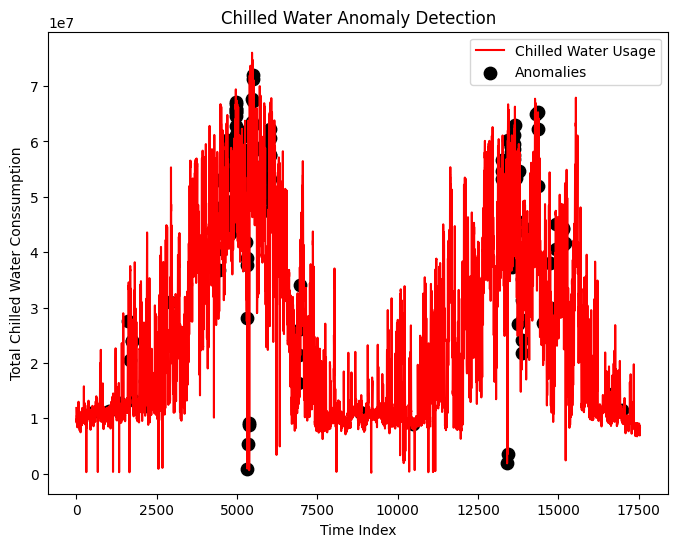

In [33]:
# Now,we will be plotting the plots of the anomaly detection on the whole graph  

plt.figure(figsize = (8,6)) 

total_usage = x.sum(axis = 1) 

plt.plot(total_usage, label = 'Chilled Water Usage', color = 'red') 

anomalies = results['Final_Anomaly']== 1 

plt.scatter(np.where(anomalies)[0],
            total_usage[anomalies],  
            color = 'black',
            s = 80, 
            label = 'Anomalies') 

plt.title("Chilled Water Anomaly Detection") 
plt.xlabel("Time Index") 
plt.ylabel("Total Chilled Water Conssumption") 

plt.legend() 
plt.show() 

# Graph explanation 
Here, the above graph explains that the red lines show the Chilled Water usage and the black dots shpw the anomalies found in the data. 

The bllack line show that the usage of the overall chilled water consumption. Hence, we can see an irregular pattern here. This happens due to many reasons like the: 

1. System Shutdown 
2. Sensor failure 
3. Maintenance period 

In [34]:
data_result.to_csv("chilled_water_anomaly_results.csv", index = False) 

print("\n✅ DONE! Results saved.") 


✅ DONE! Results saved.


In [35]:
results.to_csv("chilled_water_model_anomaly_results.csv", index = False) 

print("\n✅ DONE! Results saved.") 


✅ DONE! Results saved.
